In [1]:
import pandas as pd 

import matplotlib.pyplot as plt
# we use xgboost gradient boosting decsion trees model for this experiment 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
import xgboost as xgb

import scikitplot as skplt

In [2]:
# import scarcity labeled ads
df = pd.read_csv('./data/scarcity_dataset.csv')
df

,ad,scarcity
0,it’s almost over the shortcut law that lets yo...,1
1,on sale this week sequel to nyt bestseller pro...,1
2,refugees are especially vulnerable to the dang...,1
3,we are motivating reminding and supporting vot...,1
4,the future of decentralized nomadic coliving i...,1
...,...,...
17995,parents take part in the study of the impact o...,0
17996,lincoln news lincoln mayor orders greater rest...,0
17997,joe biden beat the nra twice he got assault we...,0
17998,reid nearly lost his eye to cancer thanks to t...,0


In [3]:
X_train, X_test,  y_train, y_test = train_test_split(df['ad'], df['scarcity'], test_size =0.2, random_state=42)

In [4]:
# Use term frequency to represent documents
tf_vectorizer = CountVectorizer() 

X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)

In [9]:
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    max_depth = 20, 
    subsample = 0.8,
    learning_rate = 0.2,
    gamma = 0.1,
)
xgb_clf.fit(X_train_tf, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=20, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

accuracy:   0.973
              precision    recall  f1-score   support

 no-scarcity       0.97      0.98      0.97      1781
    scarcity       0.98      0.97      0.97      1819

    accuracy                           0.97      3600
   macro avg       0.97      0.97      0.97      3600
weighted avg       0.97      0.97      0.97      3600

confusion matrix:
[[1739   42]
 [  57 1762]]



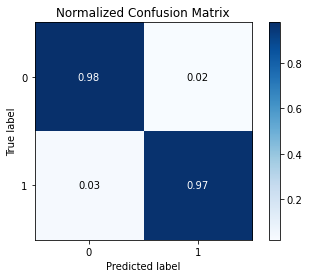

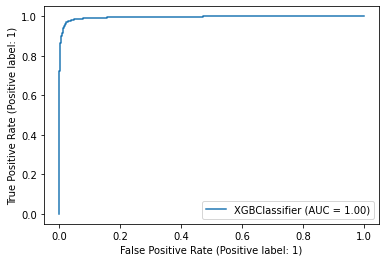

In [10]:
# predict the labels on validation dataset
predictions = xgb_clf.predict(X_test_tf)

# compute the performance measures
score1 = metrics.accuracy_score(y_test, predictions)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, predictions, target_names=['no-scarcity', 'scarcity']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, predictions))
print()
skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=True)
plt.show()
svc_disp = metrics.RocCurveDisplay.from_estimator(xgb_clf, X_test_tf, y_test)

In [11]:
df_val = pd.read_csv('./data/sample_scarcity.csv')
df_val

,ad,scarcity
0,see why everyone is celebrating at hoblit dodg...,0
1,help give people without a home a chance to le...,0
2,i am so proud of what this grassroots team has...,0
3,we have until march st to raise money for our ...,1
4,learn how to use the new staffing law to impro...,0
...,...,...
194,check out my new campaign video on why i want ...,0
195,the public should be alarmed by the fact that ...,0
196,our nation is police officers are in desperate...,1
197,by any measure dr jordan b peterson is the mos...,0


accuracy:   0.854
              precision    recall  f1-score   support

 no-scarcity       0.80      0.96      0.87       101
    scarcity       0.95      0.74      0.83        98

    accuracy                           0.85       199
   macro avg       0.87      0.85      0.85       199
weighted avg       0.87      0.85      0.85       199

confusion matrix:
[[97  4]
 [25 73]]



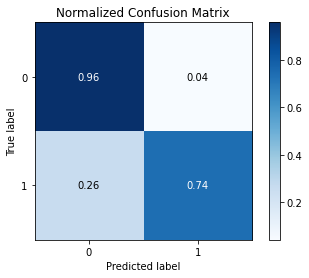

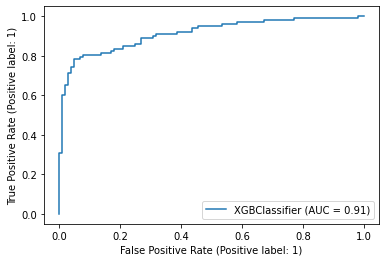

In [12]:
X_val = tf_vectorizer.transform(df_val['ad'])
y_val = df_val['scarcity']

y_pred = xgb_clf.predict(X_val)

score = metrics.accuracy_score(y_val, y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_val, y_pred, target_names=[ 'no-scarcity', 'scarcity']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_val, y_pred))
print()

skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)
plt.show()
disp = metrics.RocCurveDisplay.from_estimator(xgb_clf, X_val, y_val)